<a href="https://colab.research.google.com/github/aviator-neural/my-projects/blob/main/mnist_digit_classifier_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 4.1MB/s 
     |████████████████████████████████| 1.2MB 18.5MB/s 
     |████████████████████████████████| 51kB 6.7MB/s 
     |████████████████████████████████| 194kB 28.3MB/s 
     |████████████████████████████████| 61kB 6.8MB/s 
     |████████████████████████████████| 61kB 8.3MB/s 
Mounted at /content/gdrive


In [35]:
from fastai.vision.all import *
from fastbook import *
from fastai.vision.widgets import *

In [4]:
path = untar_data(URLs.MNIST)

In [5]:
Path.BASE_PATH=path

In [5]:
path.ls()

(#2) [Path('testing'),Path('training')]

In [6]:
(path/('training')).ls(),(path/('testing')).ls()

((#10) [Path('training/9'),Path('training/8'),Path('training/0'),Path('training/1'),Path('training/2'),Path('training/3'),Path('training/5'),Path('training/7'),Path('training/4'),Path('training/6')],
 (#10) [Path('testing/9'),Path('testing/8'),Path('testing/0'),Path('testing/1'),Path('testing/2'),Path('testing/3'),Path('testing/5'),Path('testing/7'),Path('testing/4'),Path('testing/6')])

In [6]:
digits=DataBlock(blocks=(ImageBlock,CategoryBlock),
                get_items=get_image_files,
                splitter=GrandparentSplitter(train_name='training', valid_name='testing'),
                get_y=parent_label,
                item_tfms=Resize(128)
                )

In [7]:
dls=digits.dataloaders(path)

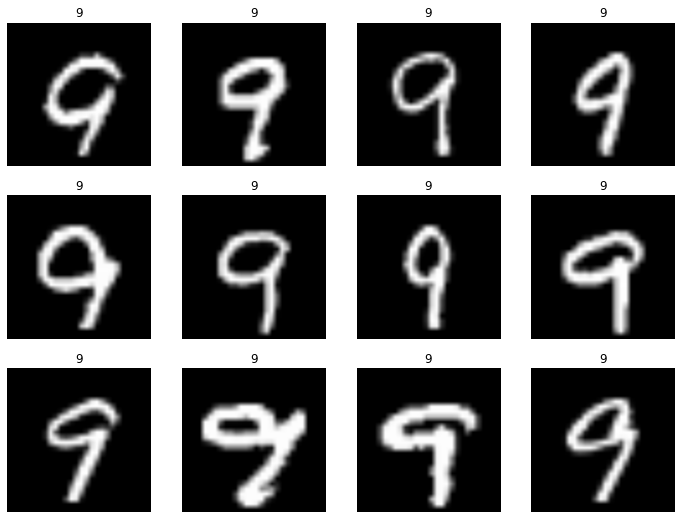

In [8]:
dls.valid.show_batch(max_n=12, nrows=3)

In [10]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


SuggestedLRs(valley=0.0004786300996784121)

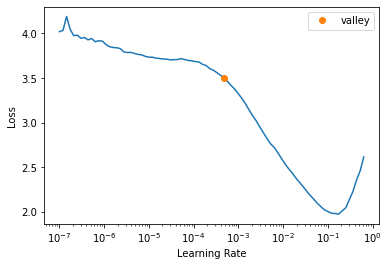

In [11]:
learn.lr_find()

In [12]:
learn.fine_tune(2, base_lr=2e-3)

epoch,train_loss,valid_loss,error_rate,time
0,0.188516,0.109618,0.034900,01:47


epoch,train_loss,valid_loss,error_rate,time
0,0.044279,0.031209,0.009300,01:57
1,0.019152,0.014255,0.004500,01:58


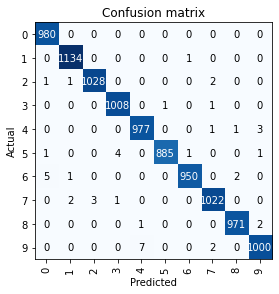

In [13]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

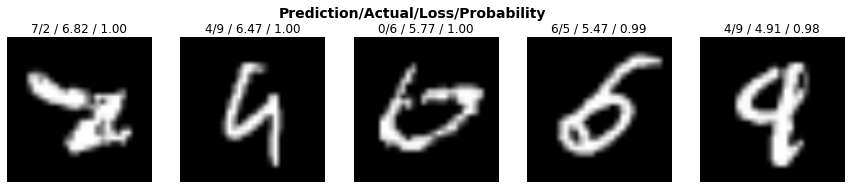

In [14]:
interp.plot_top_losses(5, nrows=1)

In [15]:
learn.export()

In [21]:
path = Path()
path.ls()

(#4) [Path('.config'),Path('gdrive'),Path('drive'),Path('sample_data')]

In [13]:
learn_inf = load_learner('/content/gdrive/MyDrive/mnist_classifier_project/export.pkl')

In [14]:
learn_inf.dls.vocab

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [36]:
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [37]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [38]:
btn_upload = widgets.FileUpload()

In [39]:
VBox([widgets.Label('Select the photo!'), 
      btn_upload, btn_run, out_pl, lbl_pred])